# Map 7 - Faults and unconformity
This map is from Bennison et al. (2011). It has dipping layers, two faults, and an unconformity.

In [1]:
# Import plotting libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

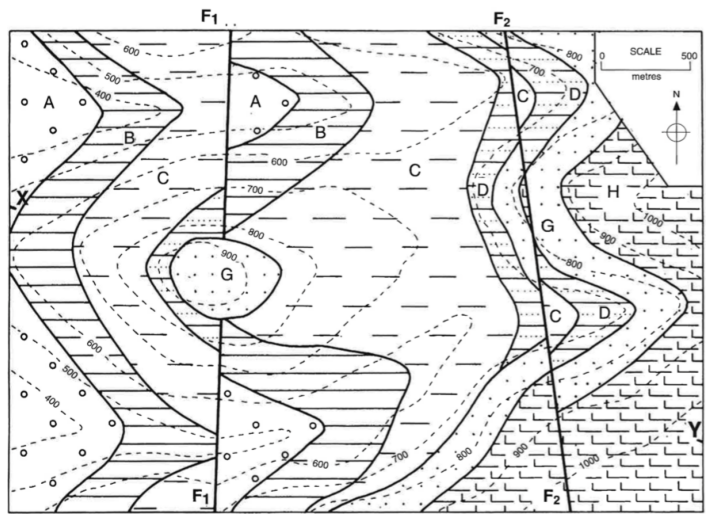

In [2]:
# Display map
img = mpimg.imread('map7.png')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [3]:
# Import other required libraries
import geopandas as gpd
import rasterio
import gemgis as gg
import os

In [4]:
# Get current directory
current_directory = os.getcwd()

In [5]:
# Read the topographic contours
topo = gpd.read_file(filename = current_directory+"/contours/contours.shp")
topo.head()

,X,Y,Z,geometry
0,25.73,358.37,400,POINT (25.730 358.373)
1,71.53,373.33,400,POINT (71.526 373.332)
2,118.73,389.65,400,POINT (118.729 389.649)
3,174.64,401.61,400,POINT (174.636 401.613)
4,231.06,418.11,400,POINT (231.064 418.105)


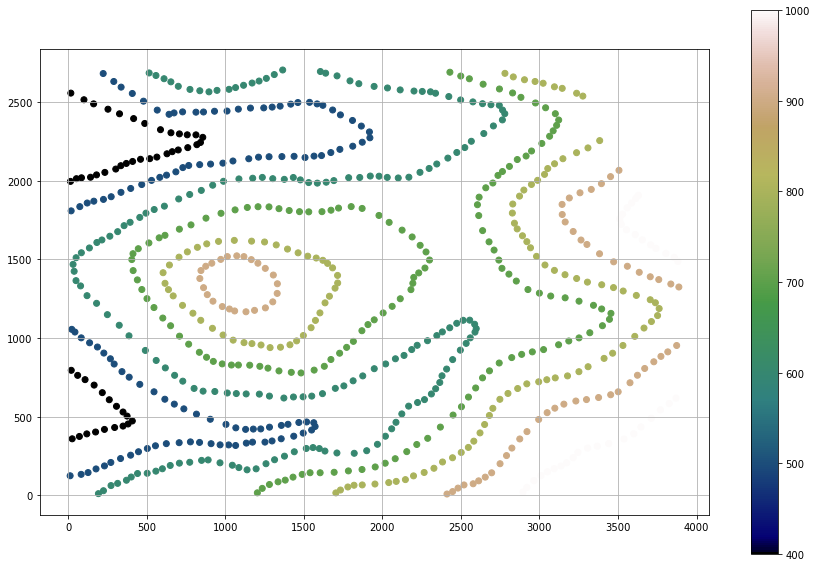

In [6]:
# Plot the contours
fix, ax = plt.subplots(1, figsize=(15, 10))
topo.plot(ax=ax, aspect='equal',column='Z', cmap='gist_earth', legend=True)
plt.grid()

In [7]:
# Interpolate contour lines to make DEM
topo_raster = gg.vector.interpolate_raster(gdf=topo,value='Z',method='rbf',res=5)

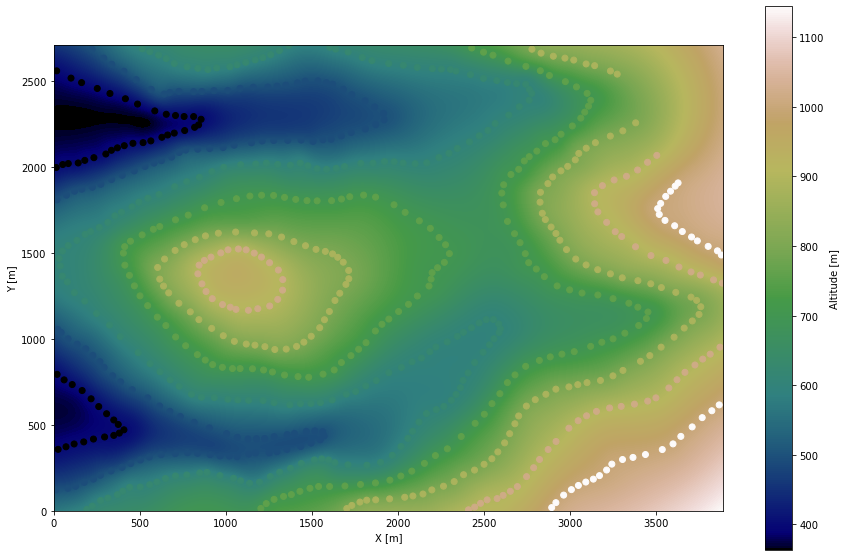

In [8]:
# Plot the DEM
fix, ax = plt.subplots(1, figsize=(15, 10))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth')
im = plt.imshow(topo_raster, origin='lower', extent=[0, 3893, 0, 2709], cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]');

In [9]:
# Save the DEM as a tif file
gg.raster.save_as_tiff(raster=topo_raster, path='dem_map7.tif', 
                       extent=[0, 3893, 0, 2709], crs='EPSG:4326', overwrite_file=True)

Raster successfully saved


In [10]:
# Open the DEM from tif file
topo_raster = rasterio.open('dem_map7.tif')

In [11]:
# Read the contacts. These are the bases of the units and the two faults
contacts = gpd.read_file(current_directory+'/contacts/contacts.shp')
contacts.head()

,X,Y,formation,geometry
0,386.36,818.76,B,POINT (386.364 818.760)
1,464.89,2146.34,B,POINT (464.891 2146.337)
2,1532.15,2220.14,B,POINT (1532.148 2220.139)
3,1585.73,589.43,B,POINT (1585.727 589.429)
4,918.66,2331.52,C,POINT (918.663 2331.523)


In [12]:
# Extract the Z coordinate of the points at the contacts
contacts_with_Z = gg.vector.extract_xyz(gdf=contacts, dem=topo_raster)
contacts_with_Z

,X,Y,formation,geometry,Z
0,386.36,818.76,B,POINT (386.364 818.760),530.88
1,464.89,2146.34,B,POINT (464.891 2146.337),398.44
2,1532.15,2220.14,B,POINT (1532.148 2220.139),478.83
3,1585.73,589.43,B,POINT (1585.727 589.429),569.11
4,918.66,2331.52,C,POINT (918.663 2331.523),421.69
5,563.87,1001.52,C,POINT (563.867 1001.525),649.29
6,2036.44,893.73,C,POINT (2036.441 893.729),611.65
7,1910.38,2090.64,C,POINT (1910.381 2090.645),569.82
8,921.30,1125.17,D,POINT (921.304 1125.168),843.75
9,1104.21,1756.98,D,POINT (1104.210 1756.984),721.08


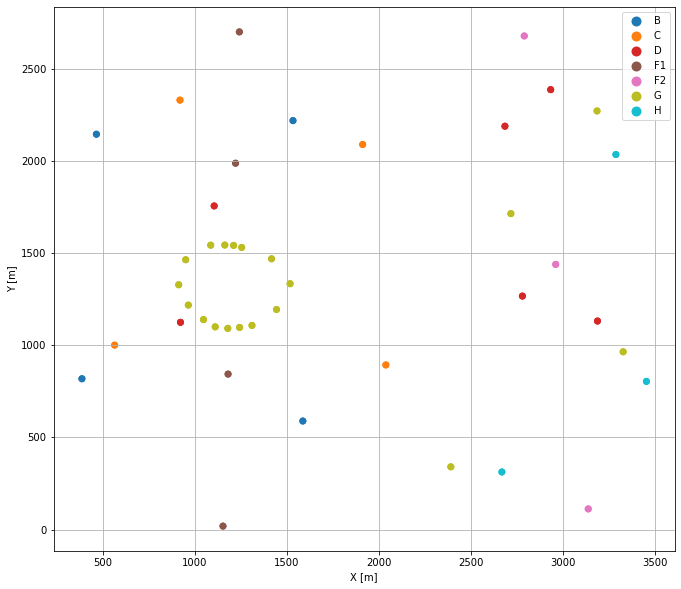

In [13]:
# Plot the points on the contacts
fig, ax = plt.subplots(1, figsize=(15, 10))
contacts.plot(ax=ax, column='formation', legend=True, aspect='equal')
contacts_with_Z.plot(ax=ax, column='formation', legend=True, aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]');

We digitize more points on the uncomformity above fault F1 to properly represent that this surface formed after the fault (F1 is older than the unconformity). However, fault F2 displaces the unconformity (i.e. F2 is younger than the unconformity).

In [14]:
# Read the strike lines on bases B and C, and faults F1 and F2
gdf = gpd.read_file(current_directory+'/strike_lines/strike_lines.shp')
gdf

,X,Y,Z,formation,id,geometry
0,2105.93,871.07,600,C,1,POINT (2105.934 871.073)
1,1827.82,2017.45,600,C,1,POINT (1827.823 2017.452)
2,1764.81,939.32,700,C,2,POINT (1764.810 939.321)
3,1548.55,1796.90,700,C,2,POINT (1548.548 1796.898)
4,1422.92,966.30,800,C,3,POINT (1422.922 966.296)
5,1263.92,1603.28,800,C,3,POINT (1263.922 1603.283)
6,2907.17,903.81,700,G,4,POINT (2907.172 903.812)
7,2910.40,1321.26,700,G,4,POINT (2910.403 1321.256)
8,978.93,1198.29,900,G,5,POINT (978.931 1198.292)
9,983.15,1510.45,900,G,5,POINT (983.153 1510.447)


In [15]:
# Convert the points into strike lines
linestring_gdf_C = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'C'])
linestring_gdf_G = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'G'])
linestring_gdf_F1 = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'F1'])
linestring_gdf_F2 = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'F2'])

In [16]:
# Check that the strike lines are valid
linestring_gdf_C.is_valid

0    True
1    True
2    True
dtype: bool

In [17]:
linestring_gdf_G.is_valid

0    True
1    True
dtype: bool

In [18]:
linestring_gdf_F1.is_valid

0    True
1    True
2    True
dtype: bool

In [19]:
linestring_gdf_F2.is_valid

0    True
1    True
dtype: bool

In [20]:
# Calculate orientations for base C
orientations_C = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_C)
orientations_C

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,17.59,76.18,650.00,POINT (1811.779 1406.186),1.00,1811.78,1406.19,C
1,17.19,75.90,750.00,POINT (1500.051 1326.449),1.00,1500.05,1326.45,C


In [21]:
# Calculate orientations for base G (unconformity)
orientations_G = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_G)
orientations_G

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,5.92,90.56,800.00,POINT (1944.915 1233.452),1.00,1944.91,1233.45,G


In [22]:
# Ignore warnings from np produced by vertical dip
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# Calculate orientations for fault F1
orientations_F1 = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_F1)
orientations_F1

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,90.00,271.68,650.00,POINT (1197.521 1326.515),1.00,1197.52,1326.51,F1
1,89.44,271.79,750.00,POINT (1197.729 1304.551),1.00,1197.73,1304.55,F1


In [23]:
# Calculate orientations for fault F2
orientations_F2 = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_F2)
orientations_F2

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,90.00,82.37,750.00,POINT (2960.204 1427.775),1.00,2960.20,1427.78,F2


Units A to D dip 18 degrees to the east. Units G and H above the unconformity dip 6 degrees east. Faults F1 and F2 are vertical. This is clear by the straight trace of these faults in the map.

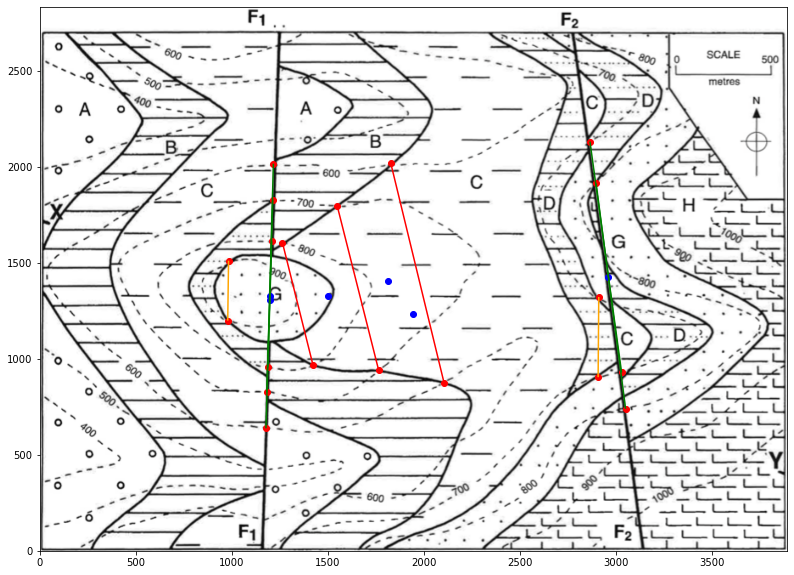

In [24]:
# Plot all this information on the map, so we can better understand this structure
fig, ax = plt.subplots(1,1,figsize=(15, 10))
ax.imshow(img, extent=[0, 3893, 0, 2830], cmap='gray')   
# plot points
gdf.plot(ax=ax, aspect='equal', color='red')
# plot strike lines
# base C
linestring_gdf_C.plot(ax=ax, aspect='equal', color='red')
orientations_C.plot(ax=ax, aspect='equal', color='blue')
# base G
linestring_gdf_G.plot(ax=ax, aspect='equal', color='orange') 
orientations_G.plot(ax=ax, aspect='equal', color='blue')
# fault F1
linestring_gdf_F1.plot(ax=ax, aspect='equal', color='green')
orientations_F1.plot(ax=ax, aspect='equal', color='blue')
# fault F2
linestring_gdf_F2.plot(ax=ax, aspect='equal', color='green') 
orientations_F2.plot(ax=ax, aspect='equal', color='blue');

In [25]:
# Merge orientations
import pandas as pd
orientations = pd.concat([orientations_C,orientations_G, orientations_F1, orientations_F2]).reset_index()
orientations

,index,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,0,17.59,76.18,650.00,POINT (1811.779 1406.186),1.00,1811.78,1406.19,C
1,1,17.19,75.90,750.00,POINT (1500.051 1326.449),1.00,1500.05,1326.45,C
2,0,5.92,90.56,800.00,POINT (1944.915 1233.452),1.00,1944.91,1233.45,G
3,0,90.00,271.68,650.00,POINT (1197.521 1326.515),1.00,1197.52,1326.51,F1
4,1,89.44,271.79,750.00,POINT (1197.729 1304.551),1.00,1197.73,1304.55,F1
5,0,90.00,82.37,750.00,POINT (2960.204 1427.775),1.00,2960.20,1427.78,F2


# Construction of the model in GemPy

In [26]:
# Import GemPy
import gempy as gp

In [27]:
# Create a geomodel object called model7
geo_model = gp.create_model('model7')

In [28]:
# Define model extent, resolution, surface points, and orientations
gp.init_data(geo_model, [0, 3893, 0, 2709, 0, 1000], [100, 100, 100],
             surface_points_df=contacts_with_Z,
             orientations_df=orientations, default_values=True);

Active grids: ['regular']


In [29]:
# Check default series
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,B,Default series,1,#015482,1
1,C,Default series,2,#9f0052,2
2,D,Default series,3,#ffbe00,3
3,H,Default series,4,#728f02,4
4,F1,Default series,5,#443988,5
5,F2,Default series,6,#ff3f20,6
6,G,Default series,7,#5DA629,7


In [30]:
# The base of the lowermost unit A does not outcrop in the map
# This unit is our "basement", we add it manually
geo_model.add_surfaces('A')

# Group the units into series
# Fault1 and Fault2 = faults, Strata1 = Units above the unconformity
# Strata2 = units below the unconformity
gp.map_stack_to_surfaces(geo_model,
                         {'Fault1': ('F1'), 'Fault2': ('F2'), 'Strata1': ('H','G'), 
                          'Strata2': ('D','C','B','A'),},
                         remove_unused_series=True)

# Tell GemPy that there are two faults
geo_model.set_is_fault(['Fault1'])
geo_model.set_is_fault(['Fault2'])

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Fault2,2,Fault,True,True,False
Strata1,3,Erosion,True,False,False
Strata2,4,Erosion,True,False,False


In [31]:
# Check that the data are correct
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
4,F1,Fault1,1,#527682,1,4,2
5,F2,Fault2,1,#527682,2,3,1
3,H,Strata1,1,#728f02,3,3,0
6,G,Strata1,2,#5DA629,4,19,1
0,B,Strata2,1,#015482,5,4,0
1,C,Strata2,2,#9f0052,6,4,2
2,D,Strata2,3,#ffbe00,7,6,0
7,A,Strata2,4,#4878d0,8,0,0


In [32]:
# Set the topography of the model
geo_model.set_topography(source='gdal',filepath='dem_map7.tif');

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


In [33]:
# Plot the points on the contacts and topography in 3D 
# This will open a PyVista window. This may take some time, please wait
from pyvistaqt import BackgroundPlotter
gp.plot_3d(geo_model, plotter_type='background',show_topography=True);

In [34]:
# Now we have enough data to interpolate. This may take some time, please wait
gp.set_interpolator(geo_model, compile_theano=True, 
                    theano_optimizer='fast_compile');

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                        values
range                 4847.07
$C_o$               559384.05
drift equations  [3, 3, 3, 3]


In [35]:
# Compute model
gp.compute_model(geo_model);

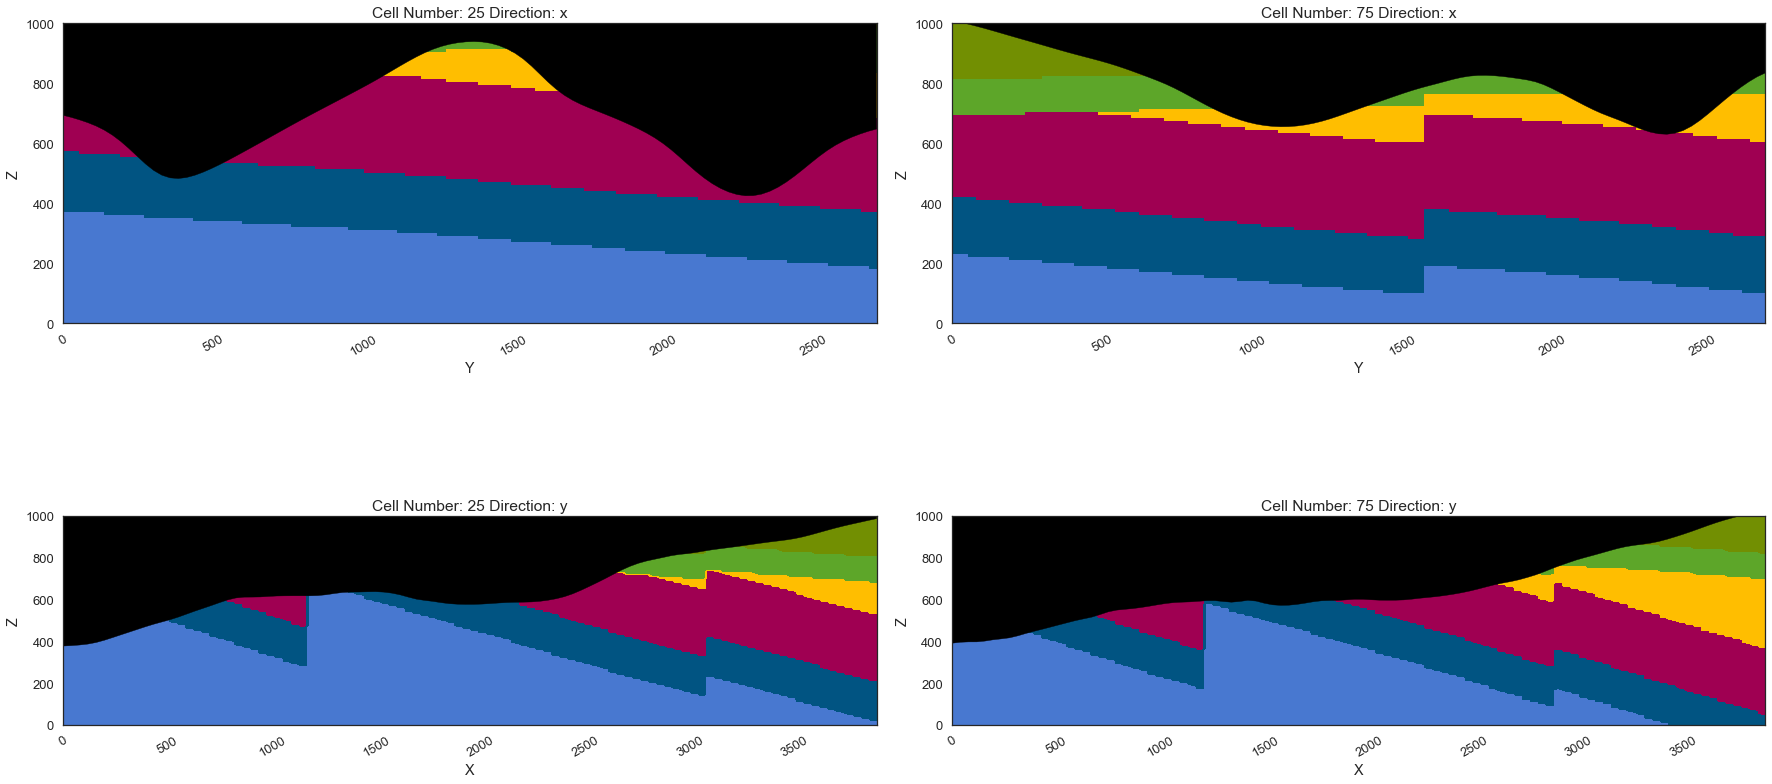

In [36]:
# Plot north-south and east-west sections without vertical exaggeration
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 75, 25, 75], 
           show_data=False, show_boundaries=False, show_topography=True, show=False);

In [37]:
# Plot the geomodel in 3D, this will open a PyVista window. This may take some time, please wait
gp.plot_3d(geo_model, plotter_type='background', show_topography=True, show_lith=False);